In [1]:
from stockSeries import *
%matplotlib inline  

In [2]:
todaydate=datetime.datetime.now()
start=todaydate-datetime.timedelta(days=200)
stock_name='601668'
base_stock = tu.get_hist_data(stock_name,start=start.strftime('%Y-%m-%d'))
a=stockSeries({'close':base_stock['close'],'open':base_stock['open'],
               'high':base_stock['high'],'low':base_stock['low']})


hit the limit of plotly try matplotlib


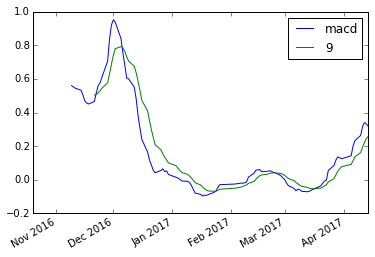

In [4]:
a.plot_macd(12,26,9,ohlcinclude=False,stock_name=stock_name)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x1,y2 ]

hit the limit of plotly try matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



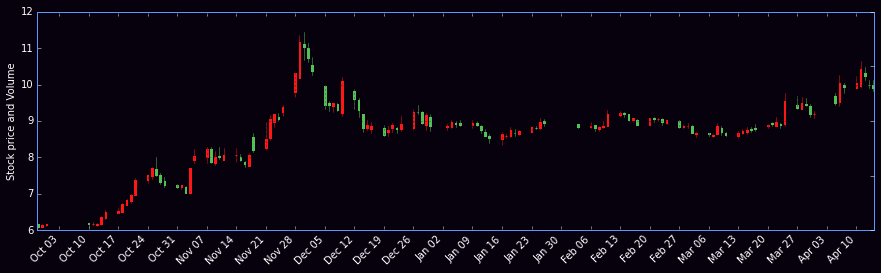

In [3]:
a.plot_macd(12,26,9,ohlcinclude=True,stock_name=stock_name)